   Membrane Dye Intensity  FRET fluorescence
0              130.069723           0.056196
1              146.836523           0.048016
2              161.585098           0.044131
3              172.328975           0.051288
4              186.650617           0.058855


Text(0, 0.5, 'FRET fluorescence')

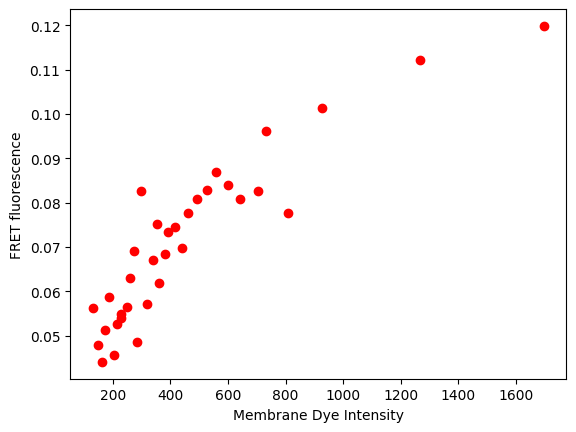

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#TODO: make sure the data doesn't have any extra spaces 
# Load data from the file
file_path = r'C:\Users\maria\OneDrive\Desktop\MembraneData1.txt'

mydataframe = pd.read_csv(file_path, delimiter='\t')
print(mydataframe.head())  # Displaying the first few rows of the dataframe

#TODO make sure the names of X and Y data are written exactly as it appears
# Extracting data columns
x = mydataframe["Membrane Dye Intensity"]
y = mydataframe["FRET fluorescence"]
plt.plot(mydataframe.iloc[:,0], mydataframe.iloc[:,1],marker='o', linestyle="", color = 'red')
plt.xlabel('Membrane Dye Intensity')
plt.ylabel('FRET fluorescence')



now that we plotted we can add the OLS function for lienar regression model

                            OLS Regression Results                            
Dep. Variable:      FRET fluorescence   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     137.8
Date:                Sun, 02 Jun 2024   Prob (F-statistic):           3.89e-13
Time:                        17:03:24   Log-Likelihood:                 116.18
No. Observations:                  34   AIC:                            -228.4
Df Residuals:                      32   BIC:                            -225.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

c:\Users\maria\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\graphics\regressionplots.py:157: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "D" (-> marker='D'). The keyword argument will take precedence.
  ax.plot(x1, results.fittedvalues[x1_argsort], 'D', color='r',


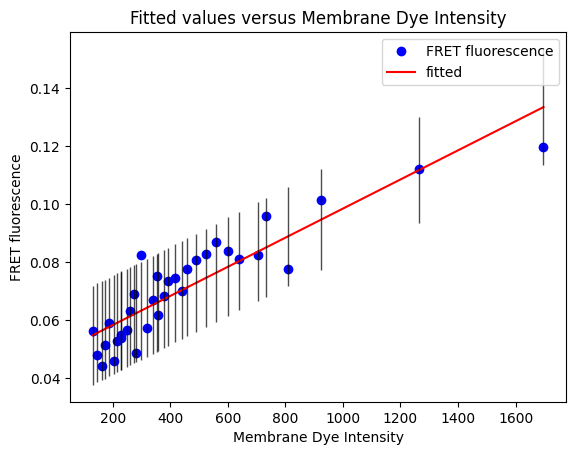

In [18]:
#Using Statsmodels ordinary least squares (ols) function

#TODO: change the x and y labels and the data frame name
import statsmodels.api as sm
x = mydataframe["Membrane Dye Intensity"]
y = mydataframe["FRET fluorescence"]
x = sm.add_constant(x)

fittedmodel = sm.OLS(y,x).fit()  #"my_model" is just the name you give to your results
print(fittedmodel.summary())
#todo :needed later for the residual plot so make sure to change later
y_predicted = fittedmodel.predict(x)


#confidence intervals 
confidence_interval = fittedmodel.conf_int()
print(confidence_interval)

#plotting values
fig,ax = plt.subplots()
fig = sm.graphics.plot_fit(fittedmodel,1,ax=ax, vlines = True, ls = "-", marker = "None")

In [9]:
# Extract the slope and intercept
intercept, slope = fittedmodel.params

# Print the slope and intercept
print(f"Slope (b1): {slope}")
print(f"Intercept (b0): {intercept}")

Slope (b1): 5.028560759567402e-05
Intercept (b0): 0.048218778272365384


for residuals plot but here we want to plot in a histogram

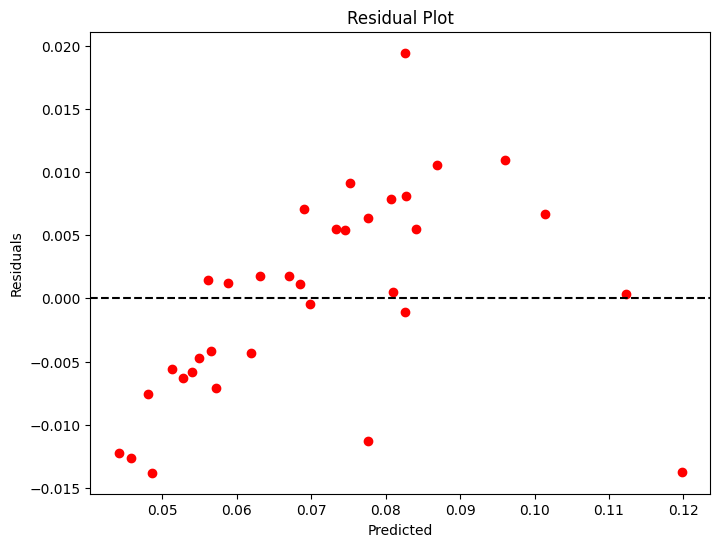

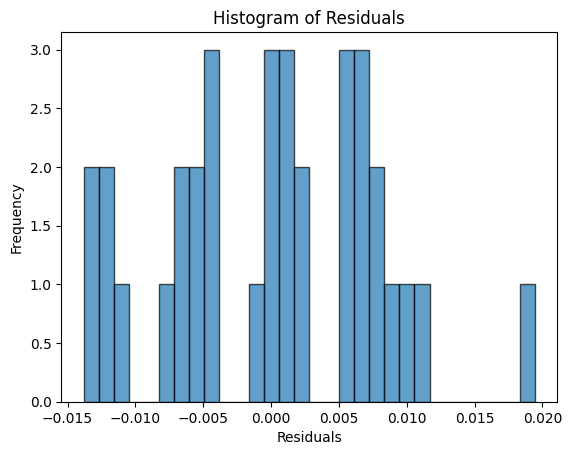

In [15]:
#residuals plot
residuals = y - y_predicted
# Plotting the residual plot
plt.figure(figsize=(8, 6))
plt.scatter(y, residuals, color='red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='black', linestyle='--')
plt.show()

#Now to do the histogram
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()